# Notebook: 04_model_training.ipynb

In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [3]:
# # Load TF-IDF features and target labels
# tfidf_path = "../data/processed/train_data_tfidf.csv"
# y_train_path = "../data/processed/y_train.csv"


In [4]:
# print(f"Loading TF-IDF features from: {tfidf_path}")
# X = pd.read_csv(tfidf_path)
# y = pd.read_csv(y_train_path).values.ravel()


In [5]:
feature_path = "../data/processed/X_train.csv"
label_path = "../data/processed/y_train.csv"


In [6]:
X = pd.read_csv(feature_path)
y = pd.read_csv(label_path)


In [7]:
print(X.shape)
print(y.shape)


(43371, 5000)
(43371, 1)


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [9]:
# Define models with hyperparameter tuning
param_grids = {
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
    },
    "LinearSVC": {
        "C": [0.1, 1, 10]
    },
    "NaiveBayes": {
        "alpha": [0.1, 0.5, 1.0]
    },
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    }
}


In [10]:
# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "LinearSVC": LinearSVC(),
    "NaiveBayes": MultinomialNB()
}


In [11]:
accuracies = {}


Tuning hyperparameters for LogisticRegression...
LogisticRegression Best Parameters: {'C': 1, 'solver': 'lbfgs'}
LogisticRegression Accuracy: 0.5696
{'action': {'precision': 0.537, 'recall': 0.29, 'f1-score': 0.3766, 'support': 200.0}, 'adult': {'precision': 0.6486, 'recall': 0.2264, 'f1-score': 0.3357, 'support': 106.0}, 'adventure': {'precision': 0.5862, 'recall': 0.1466, 'f1-score': 0.2345, 'support': 116.0}, 'animation': {'precision': 0.3333, 'recall': 0.0145, 'f1-score': 0.0278, 'support': 69.0}, 'biography': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'comedy': {'precision': 0.5147, 'recall': 0.5869, 'f1-score': 0.5484, 'support': 1220.0}, 'crime': {'precision': 0.3333, 'recall': 0.0526, 'f1-score': 0.0909, 'support': 76.0}, 'documentary': {'precision': 0.6394, 'recall': 0.8396, 'f1-score': 0.7259, 'support': 2057.0}, 'drama': {'precision': 0.5354, 'recall': 0.7824, 'f1-score': 0.6358, 'support': 2192.0}, 'family': {'precision': 0.55, 'recall': 0.0769, 'f

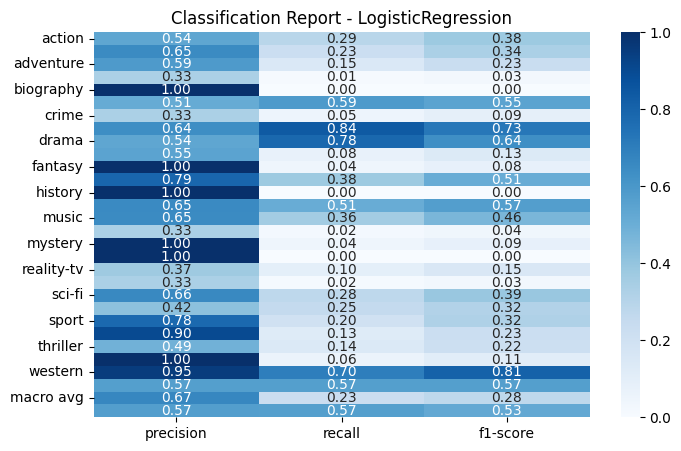

Tuning hyperparameters for RandomForest...


/Users/adityakumar/Developer/Projects/movie-genre-classifier/venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomForest Best Parameters: {'max_depth': None, 'n_estimators': 200}
RandomForest Accuracy: 0.4900
{'action': {'precision': 1.0, 'recall': 0.005, 'f1-score': 0.01, 'support': 200.0}, 'adult': {'precision': 0.75, 'recall': 0.0566, 'f1-score': 0.1053, 'support': 106.0}, 'adventure': {'precision': 0.5789, 'recall': 0.0948, 'f1-score': 0.163, 'support': 116.0}, 'animation': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 69.0}, 'biography': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'comedy': {'precision': 0.5156, 'recall': 0.3123, 'f1-score': 0.389, 'support': 1220.0}, 'crime': {'precision': 1.0, 'recall': 0.0132, 'f1-score': 0.026, 'support': 76.0}, 'documentary': {'precision': 0.561, 'recall': 0.8469, 'f1-score': 0.6749, 'support': 2057.0}, 'drama': {'precision': 0.4173, 'recall': 0.8371, 'f1-score': 0.557, 'support': 2192.0}, 'family': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 143.0}, 'fantasy': {'precision': 1.0, 'recall': 

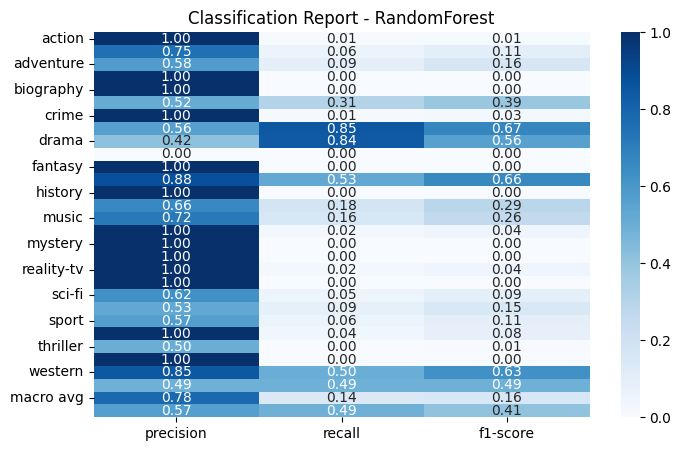

Tuning hyperparameters for LinearSVC...
LinearSVC Best Parameters: {'C': 0.1}
LinearSVC Accuracy: 0.5711
{'action': {'precision': 0.5, 'recall': 0.24, 'f1-score': 0.3243, 'support': 200.0}, 'adult': {'precision': 0.6757, 'recall': 0.2358, 'f1-score': 0.3497, 'support': 106.0}, 'adventure': {'precision': 0.5625, 'recall': 0.1552, 'f1-score': 0.2432, 'support': 116.0}, 'animation': {'precision': 0.375, 'recall': 0.0435, 'f1-score': 0.0779, 'support': 69.0}, 'biography': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'comedy': {'precision': 0.5267, 'recall': 0.5582, 'f1-score': 0.542, 'support': 1220.0}, 'crime': {'precision': 0.4, 'recall': 0.0263, 'f1-score': 0.0494, 'support': 76.0}, 'documentary': {'precision': 0.6267, 'recall': 0.8595, 'f1-score': 0.7249, 'support': 2057.0}, 'drama': {'precision': 0.5369, 'recall': 0.7874, 'f1-score': 0.6384, 'support': 2192.0}, 'family': {'precision': 0.5, 'recall': 0.042, 'f1-score': 0.0774, 'support': 143.0}, 'fantasy': {'pre

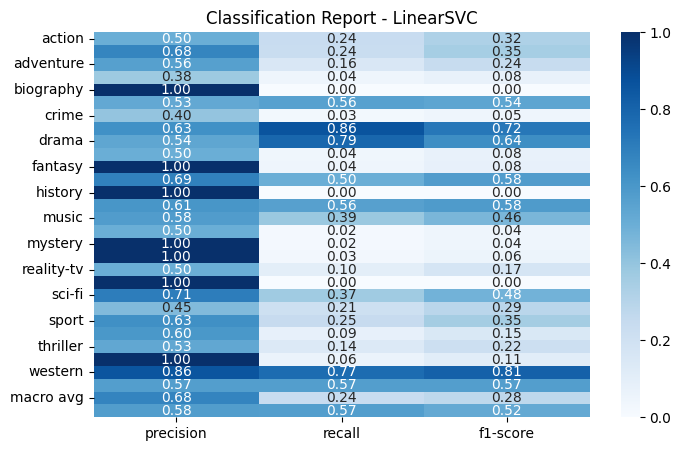

Tuning hyperparameters for NaiveBayes...
NaiveBayes Best Parameters: {'alpha': 0.1}
NaiveBayes Accuracy: 0.5374
{'action': {'precision': 0.5, 'recall': 0.17, 'f1-score': 0.2537, 'support': 200.0}, 'adult': {'precision': 0.7083, 'recall': 0.1604, 'f1-score': 0.2615, 'support': 106.0}, 'adventure': {'precision': 0.6522, 'recall': 0.1293, 'f1-score': 0.2158, 'support': 116.0}, 'animation': {'precision': 0.3333, 'recall': 0.0145, 'f1-score': 0.0278, 'support': 69.0}, 'biography': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 46.0}, 'comedy': {'precision': 0.5292, 'recall': 0.4598, 'f1-score': 0.4921, 'support': 1220.0}, 'crime': {'precision': 1.0, 'recall': 0.0263, 'f1-score': 0.0513, 'support': 76.0}, 'documentary': {'precision': 0.5753, 'recall': 0.8546, 'f1-score': 0.6877, 'support': 2057.0}, 'drama': {'precision': 0.4797, 'recall': 0.807, 'f1-score': 0.6017, 'support': 2192.0}, 'family': {'precision': 0.8, 'recall': 0.028, 'f1-score': 0.0541, 'support': 143.0}, 'fantasy

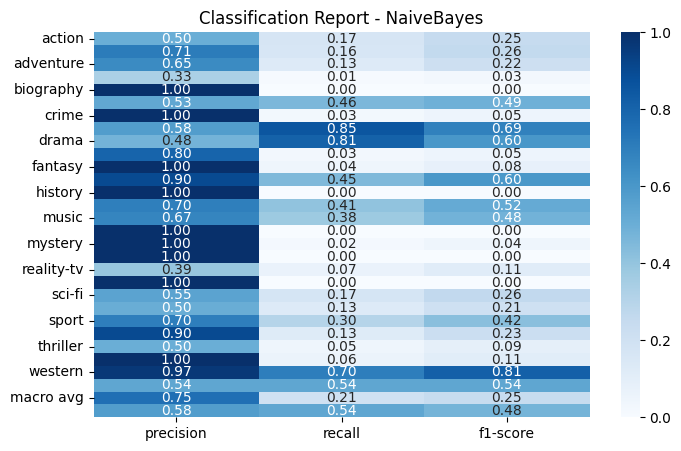

In [12]:
# Train and evaluate models
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    compact_report = {label: {metric: round(value, 4) for metric, value in scores.items()} for label, scores in report.items() if isinstance(scores, dict)}
    
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Accuracy: {acc:.4f}")
    print(compact_report)
    
    # Save best model
    model_path = f"../models/saved_models/{name.lower()}_best.pkl"
    joblib.dump(best_model, model_path)
    print(f"{name} best model saved to: {model_path}\n")
    
    # Plot classification report as heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f")
    plt.title(f"Classification Report - {name}")
    plt.show()
    # Ask user whether to continue
    user_input = input("Do you want to continue training the next model? (yes/no): ")
    if user_input.lower() != 'yes':
        print("Stopping training process.")
        break


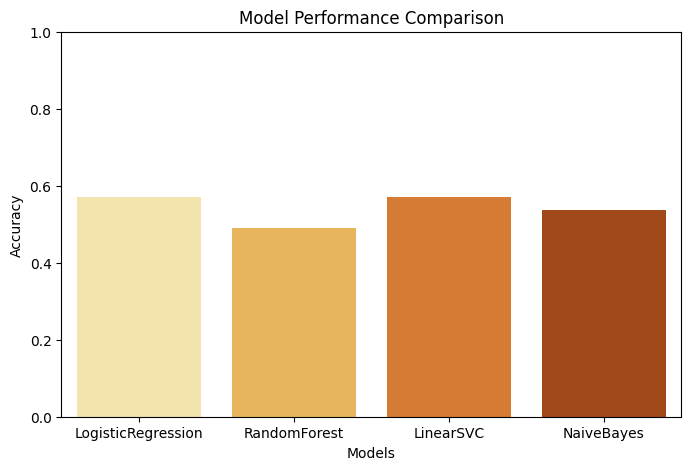

Training and hyperparameter tuning completed!


In [13]:
# Plot model performance
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),hue=accuracies.keys(), dodge=False, palette="YlOrBr")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.legend([],[], frameon=False)  # Hide legend
plt.show()

print("Training and hyperparameter tuning completed!")
